In [1]:
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [5]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [6]:
X_train_gray.shape

(34799, 32, 32, 1)

In [7]:
X_test_gray.shape

(12630, 32, 32, 1)

In [8]:
X_validation.shape

(4410, 32, 32, 3)

In [9]:
X_train_gray/=255

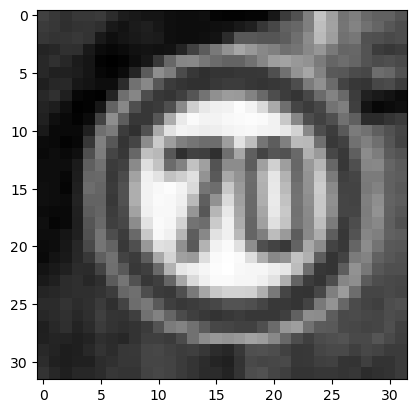

In [10]:
plt.imshow(X_train_gray[2],cmap='gray')

# STEP#4: MODEL TRAINING

The model consists of the following layers:

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [11]:
model = tf.keras.Sequential()

In [12]:
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,1)))

model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))

model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(120,activation='relu'))

model.add(tf.keras.layers.Dense(84, activation='relu'))

model.add(tf.keras.layers.Dense(43, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 32)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 120)               1

In [14]:
model.compile('adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [15]:
with tf.device('/gpu:0'):
    hist=model.fit(X_train_gray,y_train,batch_size=8,epochs=10,verbose=1)

Epoch 1/10
4350/4350 [==============================] - 24s 4ms/step - loss: 1.1908 - accuracy: 0.6615
Epoch 2/10
4350/4350 [==============================] - 18s 4ms/step - loss: 0.2770 - accuracy: 0.9203
Epoch 3/10
4350/4350 [==============================] - 17s 4ms/step - loss: 0.1586 - accuracy: 0.9545
Epoch 4/10
4350/4350 [==============================] - 17s 4ms/step - loss: 0.1045 - accuracy: 0.9705
Epoch 5/10
4350/4350 [==============================] - 21s 5ms/step - loss: 0.0777 - accuracy: 0.9777
Epoch 6/10
4350/4350 [==============================] - 26s 6ms/step - loss: 0.0572 - accuracy: 0.9835
Epoch 7/10
4350/4350 [==============================] - 21s 5ms/step - loss: 0.0523 - accuracy: 0.9851
Epoch 8/10
4350/4350 [==============================] - 19s 4ms/step - loss: 0.0425 - accuracy: 0.9871
Epoch 9/10
4350/4350 [==============================] - 19s 4ms/step - loss: 0.0334 - accuracy: 0.9895
Epoch 10/10
4350/4350 [==============================] - 18s 4ms/step - l

# STEP#5: MODEL EVALUATION

In [18]:
model.evaluate(X_test_gray, y_test)

395/395 [==============================] - 1s 4ms/step - loss: 164.8597 - accuracy: 0.8678


[164.8597412109375, 0.8677751421928406]

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

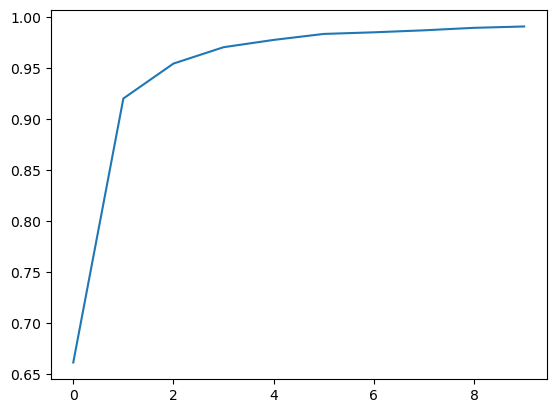

In [20]:
plt.plot(hist.history['accuracy'])

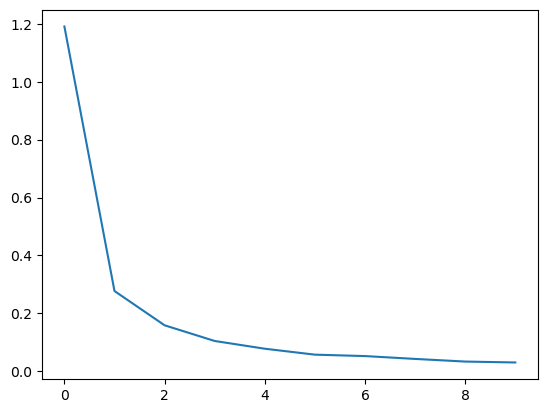

In [21]:
plt.plot(hist.history['loss'])

In [41]:
pred=np.argmax(model.predict(X_test_gray),axis=1)

395/395 [==============================] - 1s 2ms/step


<Axes: >

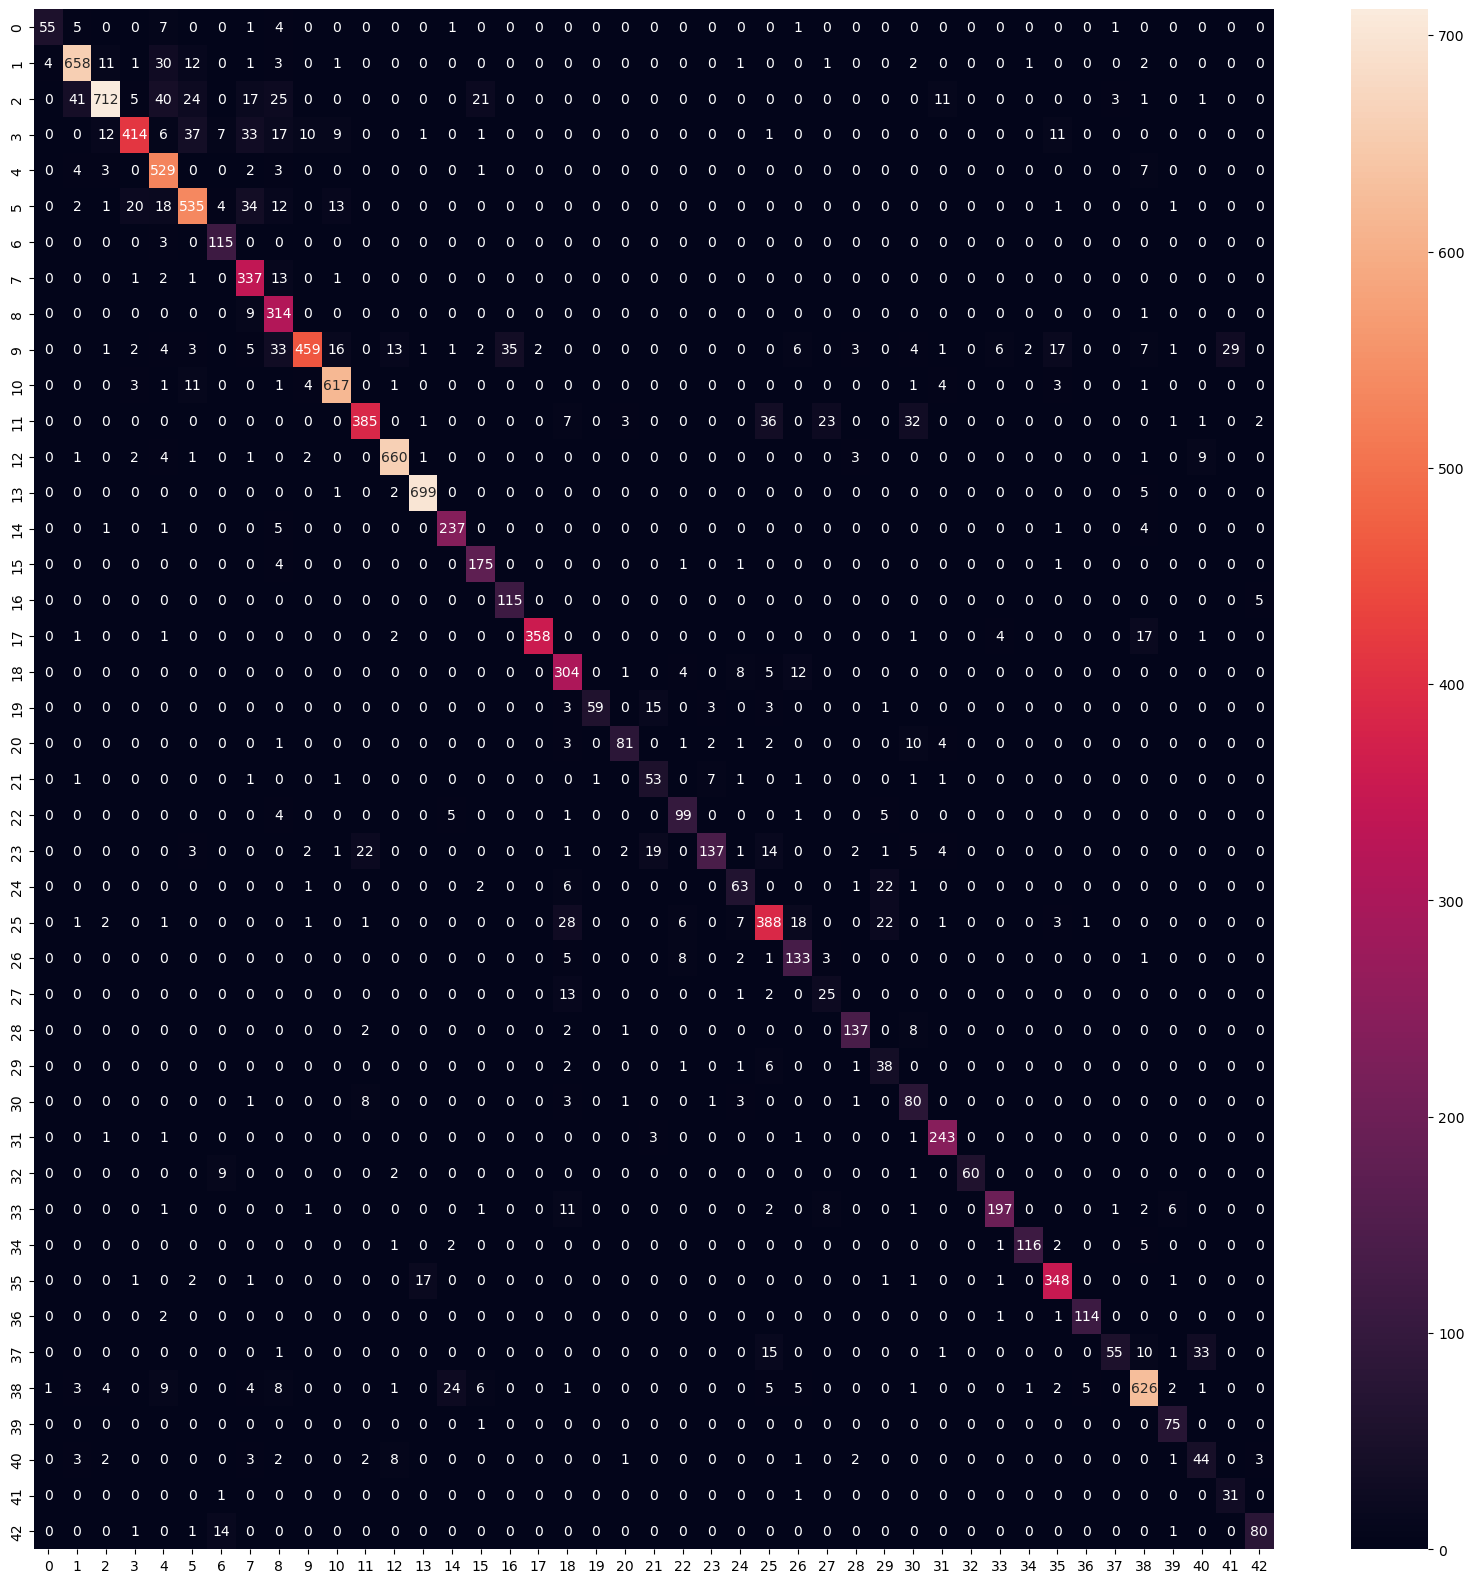

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(pred,y_test),annot=True,fmt="d")

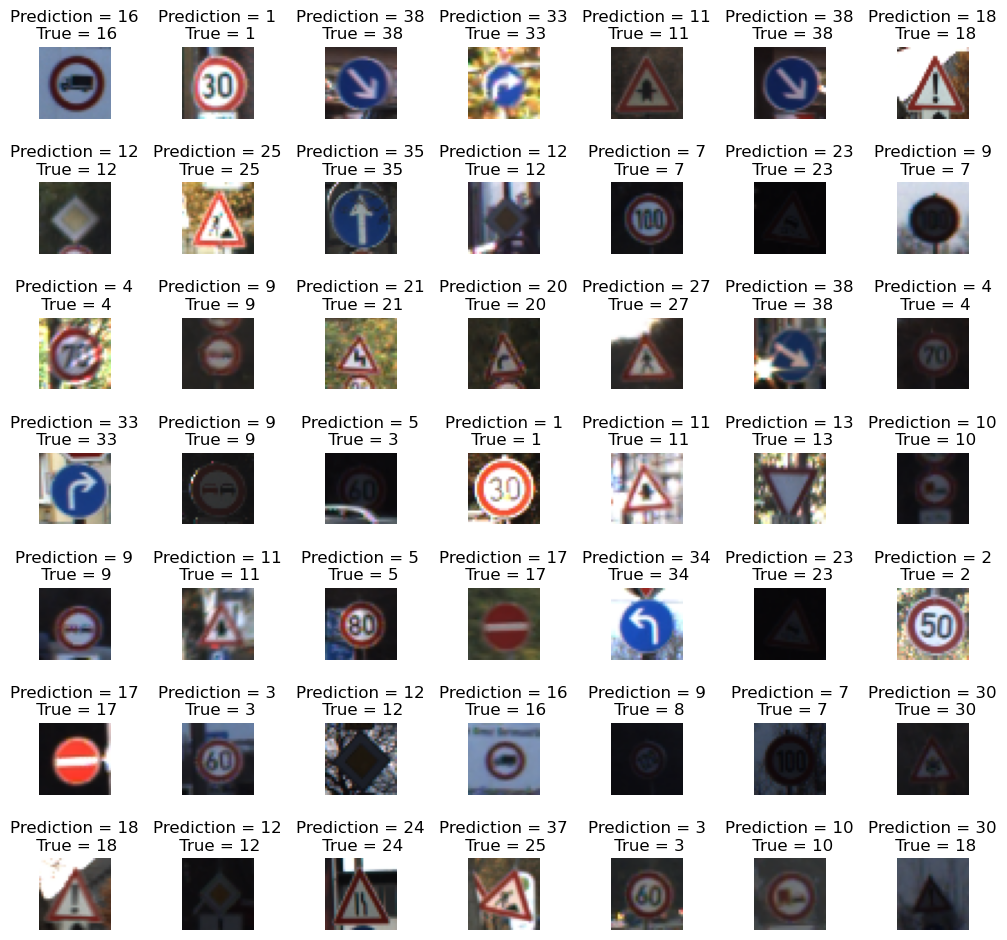

In [45]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [46]:
model.save("model.h5")